# This is an EDA for Kaggle competition NYC Taxi Duration

#### This is a learning script from Beluga's [kernal](https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367/notebook).
#### Weinan starts from August 15th, 2017.

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
N = 100000
t0 = dt.datetime.now()

train = pd.read_csv('~/Desktop/kaggle/NYC Taxi/train.csv')
test  = pd.read_csv('~/Desktop/kaggle/NYC Taxi/test.csv')
sample_submission = pd.read_csv('~/Desktop/kaggle/NYC Taxi/sample_submission.csv')


In [3]:
print 'There are {} training rows and {} test rows.\n'.format(train.shape[0], test.shape[0])

print 'There are {} training columns and {} test columns.\n'.format(train.shape[1], test.shape[1])

There are 1458644 training rows and 625134 test rows.

There are 11 training columns and 9 test columns.



In [4]:
print 'Quick look on training data set:\n'
train.head(10)

Quick look on training data set:



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [5]:
print 'Quick look on test data set:\n'
test.head(10)

Quick look on test data set:



,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N


### Some preliminary data quality checks:
1. duplication?
2. train, test overlapping?
3. missing value?

In [6]:
if train.id.nunique() == train.shape[0]: print 'Id is unique.\n'
else: print 'oops!\n'
    
if len(np.intersect1d(train.id.values, test.id.values)) == 0 : print 'Train and test obs are distinct.\n'
else: print 'oops!\n'

if not (train.isnull().any().any() & test.isnull().any().any()): print 'No missing value in data sets.\n'
else: print 'oops!\n'

Id is unique.

Train and test obs are distinct.

No missing value in data sets.



### Digest datetime variable: pickup_datetime

In [7]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime']  = pd.to_datetime(test.pickup_datetime)

train.loc[:, 'pickup_date'] = train.pickup_datetime.dt.date
test.loc[:, 'pickup_date']  = test.pickup_datetime.dt.date


train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
train.loc[:, 'dropoff_date'] = train.dropoff_datetime.dt.date

In [ ]:
train['calculated_travel_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())
if (abs(train.trip_duration - train.calculated_travel_duration) > 1).any():
    print "ooops!"
else: 
    print "Date and time are good to go!"

In [43]:
print "The longest trip in training set takes {} days.".format(train.trip_duration.max() / (3600*24))

The longest trip in training set takes 40 days.


### Digest T/F variable: store_and_fwd_flag

In [17]:
train.loc[:, 'store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag == 'Y')
test.loc[:, 'store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag == 'Y')

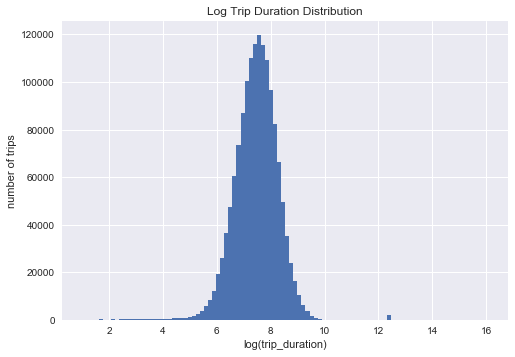

In [49]:
plt.hist(np.log(train.trip_duration.values) + 1, bins = 100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of trips')
plt.title('Log Trip Duration Distribution')
plt.show()

In [55]:
type(train.groupby('pickup_date').count()[['id']])

pandas.core.frame.DataFrame